Przygotujemy model regresji wykorzystując do tego techniki budowy modeli klasyfikacyjnych. Skorzystam w ćwiczeniu z danych California Housing ale w wersji uprosczninej tj. tylko cechy numeryczne oraz bez wartości null. Nazwałem ćwiczenie indujcją ponieważ analogicznie jak w indukcji potrafimy coś zrobić dla niższego wymiaru i zakładamy prawdziwość tezy dla wyższego wymiaru. W tym wypadku tezą jest dobrze zbudowany model :)

In [6]:
# importujemy dane 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2)

In [17]:
# jako model bazowy wykorzystam model regresji liniowej
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) 

y_hat = model.predict(X_train)
y_hat_test = model.predict(X_test)

print(model.coef_)
print(housing.feature_names)

[ 4.32879248e-01  9.54652539e-03 -1.03041297e-01  6.16390918e-01
 -2.87434374e-07 -3.46232883e-03 -4.15456082e-01 -4.28863542e-01]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [28]:
# miary dopasowania na zbiorze treningowym oraz walidacyjnym

from sklearn.metrics import mean_squared_error

print("Wartość MSE dla zbioru treningowego to {0:.4f}, dla testowego to {1:.4f}".
      format(mean_squared_error(y_train, y_hat, squared=True), mean_squared_error(y_test, y_hat_test, squared=True)))

print("Wartość RMSE dla zbioru treningowego to {0:.4f}, dla testowego to {1:.4f}".
      format(mean_squared_error(y_train, y_hat, squared=False), mean_squared_error(y_test, y_hat_test, squared=False)))


Wartość MSE dla zbioru treningowego to 0.5158, dla testowego to 0.5590
Wartość RMSE dla zbioru treningowego to 0.7182, dla testowego to 0.7477


In [48]:
# kilka sprawdzeń z jakimi zmiennymi mamy do czynienia
import numpy as np
from statistics import pstdev, median
print(np.average(y_train))
print(np.average(y_test))

print(pstdev(y_train))
print(pstdev(y_test))


2.060689757751938
2.100031814437984
1.1416189266376524
1.2013900981115107


<AxesSubplot:>

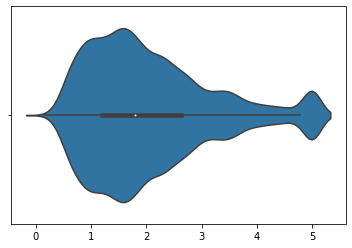

In [34]:
# jeszcze rozkład pudełkowy zmiennej celu
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x=y_train)

<AxesSubplot:>

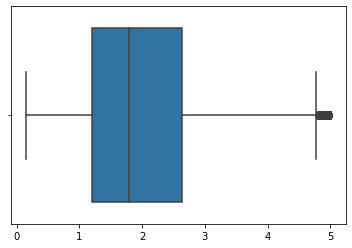

In [35]:
sns.boxplot(x=y_train)

Występuje pare obserwacji odstających, można je "przyciąć" do wartości równej rórnemu kwantylowi albo usunąć. 
Na potrzeby tego ćwiczenia pozostawiam je i wykorzystam w procesie normalizacji minmax 

In [32]:
# wartość współczynnika determinacji 
from sklearn.metrics import r2_score

print("Wartość R2 na zbiorze treningowym to {0:4f}, na zbiorze testowym to {1:4f}".
      format(r2_score(y_train, y_hat), r2_score(y_test, y_hat_test)))

Wartość R2 na zbiorze treningowym to 0.604213, na zbiorze testowym to 0.612708


Przechodzę teraz do budowy modelu regresji korzystając z modelu kategorialnego.
W tym celu skorzystam z modelu regresji logistycznej chociaż aby lepiej dobrać funkcję należałoby najpierw lepiej przyglądnąć się 
rozkładowi zmiennej celu

<AxesSubplot:>

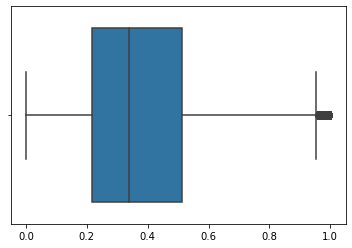

In [47]:
# normalizacja zmiennej celu oraz pozbycie się wartości odstających. 
#y_prim = (y - y_min)/(y_max-y_min)*(new_y_max - new_y_min)

# należy pamiętać, żeby skorzystać z tego samego zestawu parametrów nomralizacji danych również na zbiorze walidacyjnym
y_min = np.min(y_train) 
y_max = np.max(y_train)

y_train_b = [ (y - y_min)/(y_max - y_min) for y in y_train]

sns.boxplot(x= y_train_b)

In [53]:
# teraz przygotowuję kategorialną zmienną celu
# najpierw wartość progowa, ja decyduę się na medianę 
y_treshold = median(y_train_b)

y_train_cat = [1 if y >= y_treshold else 0 for y in y_train_b ]

np.average(y_train_cat)

0.5004239341085271